'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


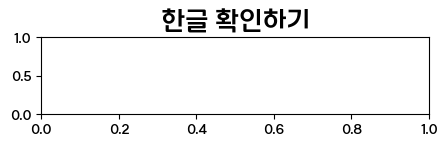

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
!apt-get install fonts-nanum
from matplotlib import font_manager, rc

from scipy.stats import chisquare

font_path = 'KNU TRUTH.ttf' #한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

plt.figure(figsize=(5,1))
plt.title('한글 확인하기', fontsize=20)
plt.show()

import csv

데이터 읽고 결측값 제거, CCTV 비례 범죄 수 추가

In [44]:
f = open('데이터 정리.csv','r')
df = pd.read_csv(f)
######>

df['인구 비례 CCTV'] = df['설치 수']/df['인구수']
df = df.dropna()

df.info

<bound method DataFrame.info of     지역      인구수    설치 수     범죄량   인구비례 범죄  인구 비례 CCTV
0   강원  1528635   62369   45398  0.029698    0.040800
1   경남  3253619   83788  111102  0.034147    0.025752
2   경북  2556262   81849   75300  0.029457    0.032019
3   대구  2376044   54752   72339  0.030445    0.023043
4   서울  9390925  238299  274830  0.029265    0.025375
5   세종   386256   11697    6147  0.015914    0.030283
6   울산  1103752   29821   23463  0.021257    0.027018
7   인천  2993492   88013   85432  0.028539    0.029401
8   전남  1804875   63653   60205  0.033357    0.035267
9   전북  1756183   49538   52587  0.029944    0.028208
10  제주   675845   31521   26499  0.039209    0.046639
11  충남  2129591   69510   63290  0.029719    0.032640
12  충북  1594038   49176   47020  0.029497    0.030850>

지역별 인구수 비례 범죄량 시각화

<Axes: xlabel='지역'>

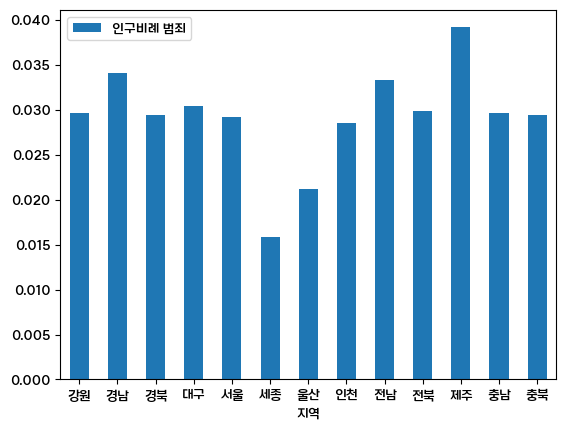

In [45]:
df.plot.bar(x='지역', y='인구비례 범죄', rot=0)

지역별 CCTV 수

<Axes: xlabel='지역'>

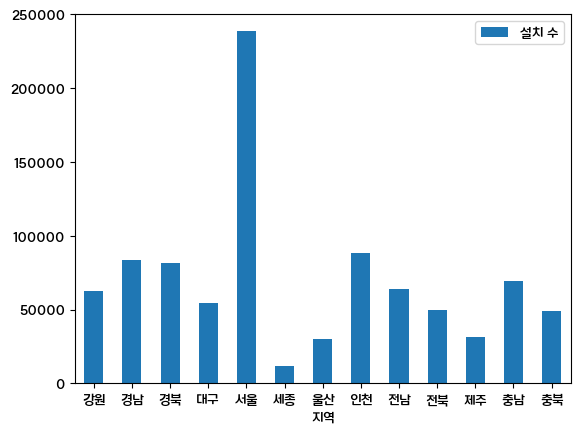

In [46]:
df.plot.bar(x='지역', y='설치 수', rot=0)

독립표본 T-분석 (Independent Two-Sample t-test)을 통해 인구대비 CCTV 설치율과 인구대비 범죄율이 일치하는지를 검증한다.
이 때 귀무가설은 "인구대비 CCTV 설치율과 인구대비 범죄율은 일치한다."이며, 대립가설은 "인구대비 CCTV 설치율과 인구대비 범죄율은 일치하지 않는다."이다.

In [47]:
# 독립표본 T-분석에는 scipy의 ttest_ind 메서드를 이용합니다.
from scipy.stats import ttest_ind


# 인구대비 범죄율을 추출한다.
crime_proportional_to_population = df['인구비례 범죄']

# 인구대비 CCTV 설치율을 추출한다.
CCTV_proportional_to_population = df['인구 비례 CCTV']

# 평균을 비교할 두 표본을 ttest_ind의 파라미터로 전달하여 p값을 계산.
_, p_value = ttest_ind(crime_proportional_to_population, CCTV_proportional_to_population)

# 유의수준을 0.02로 선택.
a = 0.02

if p_value < a:
  print(f"P-value [{p_value}] < Significant level [{a}]; 인구대비 CCTV 설치율과 인구대비 범죄율은 일치하지 않는다.")
else:
  print(f"P-value [{p_value}] >= Significant level [{a}]; 인구대비 CCTV 설치율과 인구대비 범죄율은 일치한다.")

# 결과를 보면, p값이 유의수준보다 작기 때문에 대립가설을 받아들입니다.
# 따라서, 이 분석의 결론은 "생존한 승객과 사망한 승객의 평균 운임은 같지 않다"가 됩니다.

# 실제로 두 표본의 평균을 확인해보면, 약 48과 22로 상당히 큰 차이가 있음을 확인할 수 있습니다.
print(crime_proportional_to_population.mean())
print(CCTV_proportional_to_population.mean())

P-value [0.39713929950321714] >= Significant level [0.02]; 인구대비 CCTV 설치율과 인구대비 범죄율은 일치한다.
0.029265429692307696
0.03133056010464306
